# 課題1：仮説検定を実装する

ここでは、いわゆる古典的統計手法と言われる仮説検定をPythonで実装してみましょう。

レッスン6までで学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。

## 1. 必要なモジュールの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

%matplotlib inline

## 2. 1標本における解析

本課題では乱数を発生させることでデータを作成し、それについて解析してみましょう。

乱数のパラメータを変更すると結果がどう変化するのか、試してみるとより理解が深まるかと思います。

In [2]:
# 任意の平均値・標準偏差をもつ正規乱数をサイズ1000個で作成し、"data1"に格納
norm_dist = stats.norm(loc = 15, scale = 1)
data1 = norm_dist.rvs(size = 1000)

(array([  9.,  33.,  82., 169., 217., 192., 167.,  87.,  36.,   8.]),
 array([12.02169665, 12.62119373, 13.22069081, 13.82018788, 14.41968496,
        15.01918204, 15.61867912, 16.21817619, 16.81767327, 17.41717035,
        18.01666743]),
 <a list of 10 Patch objects>)

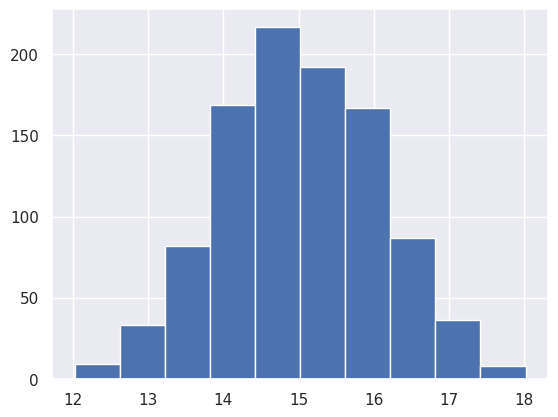

In [3]:
#　data1のヒストグラムを作成
plt.hist(data1)

In [21]:
# 母平均の点推定を計算し、結果を表示
mu = np.mean(data1)
mu

15.02102684525285

In [23]:
# 95%信頼区間の推定を行い、上側信頼限界と下側信頼限界の値を表示
df = len(data1)-1
sigma = np.std(data1, ddof=1)
se = sigma/np.sqrt(len(data1))

interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale = se)
interval

(14.956017184092543, 15.086036506413157)

In [36]:
# 任意の帰無仮説を設定し、それに基づきt値を計算して、片側検定した結果を表示してください
t_value = (mu-15)/se

alpha = stats.t.cdf(np.abs(t_value), df=df)
1-alpha

0.2628836143424006

In [31]:
# 任意の帰無仮説を設定し、それに基づきt値を計算して、両側検定した結果を表示してください
alpha = stats.t.cdf(np.abs(t_value), df=df)
(1-alpha)*2

stats.ttest_1samp(data1, 15)

Ttest_1sampResult(statistic=0.6347033579325585, pvalue=0.525767228684801)

## 3. 2標本における解析

標本をもう1つ増やし、先ほどの標本と差があるのか否かについて検討してみましょう。

In [32]:
# 任意の平均値・標準偏差をもつ正規乱数をサイズ1000個で作成し、"data2"に格納
norm_dist = stats.norm(loc = 15, scale = 1)
data2 = norm_dist.rvs(size = 1000)

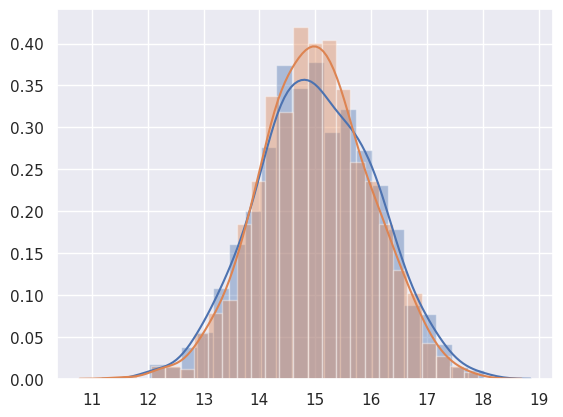

In [33]:
# data1とdata2をヒストグラムにてプロット
sns.distplot(data1)
sns.distplot(data2)

In [34]:
# data1, data2それぞれの値を使って「対応のあるt検定」で計算し、結果を表示
data3 = data2 - data1

stats.ttest_1samp(data3, 0)

Ttest_1sampResult(statistic=-0.5997492823572418, pvalue=0.5488093406379224)

In [35]:
# data1, data2それぞれの値を使って「対応のないt検定」で計算し、結果を表示
stats.ttest_ind(data1, data2, equal_var = False)

Ttest_indResult(statistic=0.6016076824756652, pvalue=0.5475038528409184)

## 4. ここまでの仮説検定の結果を解釈して下記に記載してください

data1はdata2と「 有意差があるとは言い切れない 」（ここをダブルクリックして編集状態にし、カギカッコの中に文言を埋めてください）

※ なお、pvalueがマイナス指数表記となっている場合に注意ください。  
　 例えば pvalue 1.20e-12 であった場合は、1.20 * 10^-12 という意味となります。
  
[Lesson 14 Chapter 3.1 指数と対数 指数](https://techacademy.jp/my/datascience/data-science3/math-basic#chapter-3-1)